<a href="https://colab.research.google.com/github/syamsulrizal123/SLO/blob/main/Cancer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/My Drive/Colab Notebooks (1)

/content/drive/My Drive/Colab Notebooks (1)


In [ ]:
import numpy as np
import pandas as pd

#baca dataset
dataset = pd.read_csv('data_cancer.csv')

In [ ]:
dataset.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [ ]:
dataset.head()

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302         M  ...          0.4601                  0.11890
1    842517         M  ...          0.2750                  0.08902
2  84300903         M  ...          0.3613                  0.08758
3  84348301         M  ...          0.6638                  0.17300
4  84358402         M  ...          0.2364                  0.07678

[5 rows x 32 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.subplots(figsize=(15,15))
corr=dataset.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#kita buat data (X) dan label nya (Y)
x=dataset.iloc[:, 2:31].values
y=dataset.iloc[:, 1].values

In [ ]:
print(y)

In [ ]:
x.shape

(569, 29)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
# print(y_kmeans)

In [ ]:
plt.scatter(x[:,0], x[:,3], c=y_kmeans, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,5], color='black')

In [ ]:
8Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [ ]:
x.shape

(569, 29)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

principal component 1  principal component 2
0               8.966336               1.984413
1               2.463064              -3.856484
2               5.777253              -0.841503
3               6.283637               9.494189
4               4.077171              -1.544879

In [ ]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()

target
0      M
1      M
2      M
3      M
4      M

In [ ]:
finalDf = pd.concat([principalDf, pd_y[['target']]], axis = 1)
finalDf.head()

principal component 1  principal component 2 target
0               8.966336               1.984413      M
1               2.463064              -3.856484      M
2               5.777253              -0.841503      M
3               6.283637               9.494189      M
4               4.077171              -1.544879      M

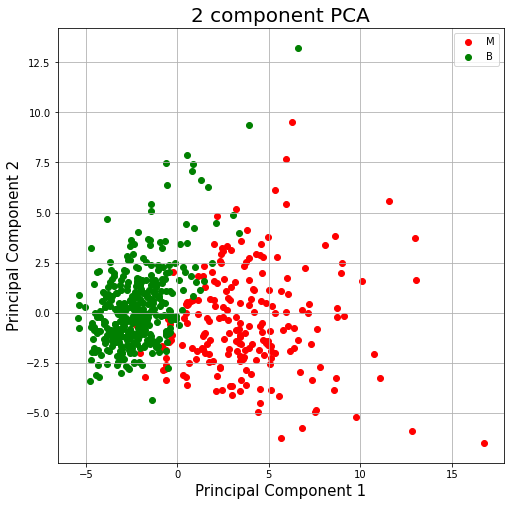

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [ ]:
X2=dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
Y2=dataset[['diagnosis']]

In [ ]:
X2 = StandardScaler().fit_transform(X2)

In [ ]:
X2.shape

(569, 5)

In [ ]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X2)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf2.head()

principal component 1  principal component 2
0               3.370619              -1.099020
1               3.920194               0.160186
2               3.383389               0.147749
3              -1.189340              -0.490839
4               3.574312               0.503281

In [ ]:
finalDf2 = pd.concat([principalDf2, dataset[['diagnosis']]], axis = 1)
finalDf2.head()

principal component 1  principal component 2 diagnosis
0               3.370619              -1.099020         M
1               3.920194               0.160186         M
2               3.383389               0.147749         M
3              -1.189340              -0.490839         M
4               3.574312               0.503281         M

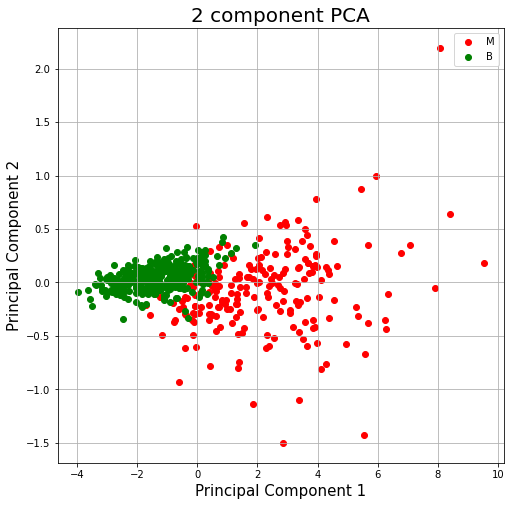

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['diagnosis'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()